In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

import tensorflow as tf

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
df = pd.read_csv("ifood_df.csv")

In [8]:
col_names = list(df.select_dtypes(include=np.number).columns)
print(col_names)

['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall']


In [9]:
#No Missing Values
df[df.columns[df.isna().any()]]

""
0
1
2
3
4
...
2200
2201
2202
2203


In [10]:
df['Fequency'] = (df['NumDealsPurchases']+df['NumWebPurchases']+ df['NumCatalogPurchases']+ df['NumStorePurchases'])/df['Customer_Days']
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Fequency
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,0.008859
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,0.002641
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,0.008499
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,0.003481
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,0.008190


In [11]:
X = df.copy()
scaler = StandardScaler()
features = ['Fequency', 'Income','MntTotal','Recency']
X[features] = scaler.fit_transform(X[features])

In [7]:
X = X.loc[:, X.columns.intersection(features)]
X

,Income,Recency,MntTotal,Fequency
0,0.314651,0.310830,1.678056,0.990627
1,-0.254877,-0.380600,-0.940880,-1.100288
2,0.965354,-0.795458,0.297384,0.869445
3,-1.206087,-0.795458,-0.893989,-0.817679
4,0.322136,1.555404,-0.270516,0.765564
...,...,...,...,...
2200,0.463624,-0.104028,0.922594,0.394654
2201,0.598401,0.241687,-0.220152,1.408279
2202,0.258780,1.451690,1.136207,0.772705
2203,0.851004,-1.417746,0.380745,1.352526


In [8]:
X.shape
X.info()
X.describe().transpose()
X.head(10)
X.tail()

(2205, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Income    2205 non-null   float64
 1   Recency   2205 non-null   float64
 2   MntTotal  2205 non-null   float64
 3   Fequency  2205 non-null   float64
dtypes: float64(4)
memory usage: 69.0 KB


,count,mean,std,min,25%,50%,75%,max
Income,2205.0,1.237672e-17,1.000227,-2.409272,-0.793211,-0.016182,0.804453,2.999363
Recency,2205.0,6.968475e-17,1.000227,-1.694318,-0.864601,-0.000314,0.863974,1.728262
MntTotal,2205.0,-5.865804e-17,1.000227,-0.970404,-0.880096,-0.381664,0.696824,3.348757
Fequency,2205.0,-9.828369e-17,1.000227,-1.988303,-0.933246,0.030882,0.803761,3.370945


,Income,Recency,MntTotal,Fequency
0,0.314651,0.310830,1.678056,0.990627
1,-0.254877,-0.380600,-0.940880,-1.100288
2,0.965354,-0.795458,0.297384,0.869445
3,-1.206087,-0.795458,-0.893989,-0.817679
4,0.322136,1.555404,-0.270516,0.765564
5,0.525918,-1.141173,0.241809,1.028727
6,0.193782,-0.518886,0.000409,0.577647
7,-0.877331,-0.588029,-0.723793,-0.682939
8,-1.027174,-1.037459,-0.900936,-1.196167
9,-2.220073,0.656545,-0.914830,-1.691645


,Income,Recency,MntTotal,Fequency
2200,0.463624,-0.104028,0.922594,0.394654
2201,0.598401,0.241687,-0.220152,1.408279
2202,0.258780,1.451690,1.136207,0.772705
2203,0.851004,-1.417746,0.380745,1.352526
2204,0.060213,-0.311457,-0.715110,-0.658249


In [9]:
#K means
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(X)

KMeans(n_clusters=5, random_state=42)

C:\Users\annie\anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


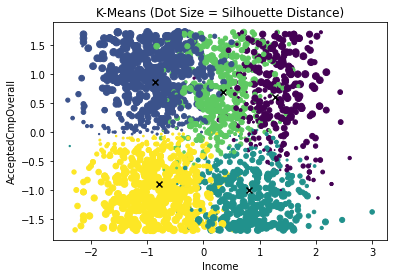

In [10]:
sample_silhouette_values = silhouette_samples(X, k_means.labels_)
sizes = 100*sample_silhouette_values

plt.figure();

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)");
plt.xlabel('Income');
plt.ylabel('AcceptedCmpOverall');

# hYPER TUNING

Experiment With Lot of Ks

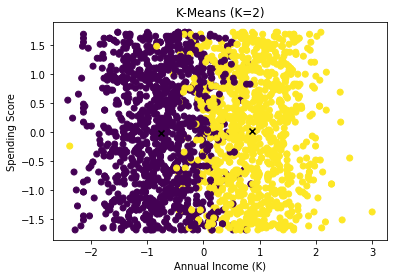

K=2, WCSS=4355.28, Sil=0.43


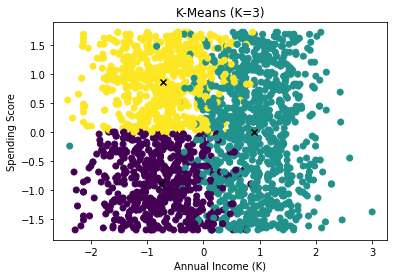

K=3, WCSS=3438.51, Sil=0.36


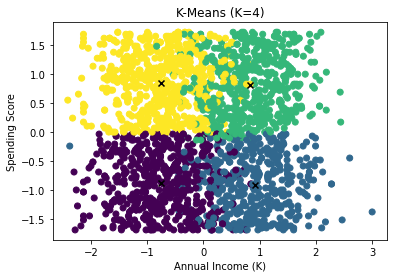

K=4, WCSS=2705.65, Sil=0.32


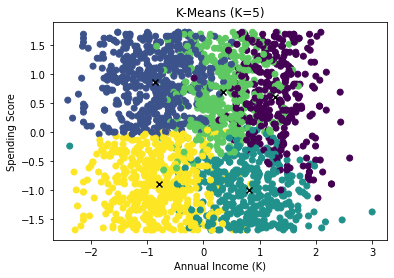

K=5, WCSS=2300.20, Sil=0.32


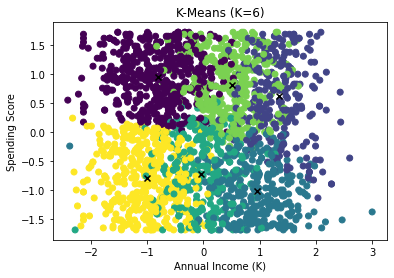

K=6, WCSS=2033.09, Sil=0.31


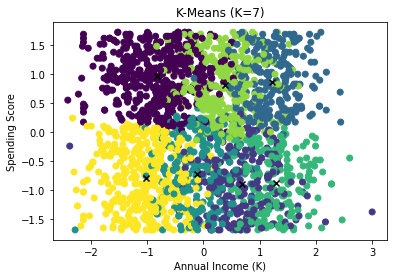

K=7, WCSS=1855.65, Sil=0.29


In [11]:
def do_kmeans(X, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(X)

    plt.figure();
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")
    plt.title("K-Means (K={})".format(k));
    plt.xlabel('Annual Income (K)');
    plt.ylabel('Spending Score');
    #plt.savefig('out/simple_kmeans_k{}.png'.format(k))
    plt.show()
    
    wcss = k_means.inertia_
    sil = silhouette_score(X, k_means.labels_)
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(2, 8):
    do_kmeans(X, k)

# The Elbow Method

# The Elbow Method can help us choose the best values for hyperparameters, in this case, K. 
Both Inertia  graph indicate that we should use K =4, Silhouette graphs indicate that we should use K=3, or K=4. So two votes for K=4, we will use K=4

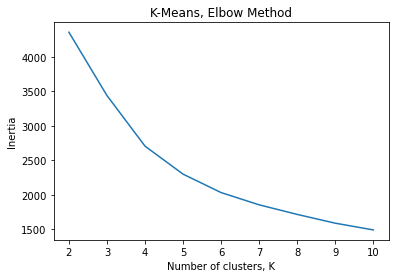

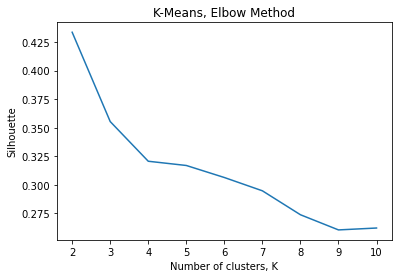

In [12]:
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

In [13]:
#Hierarchical (Agglomerative)
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(X)

AgglomerativeClustering(n_clusters=5)

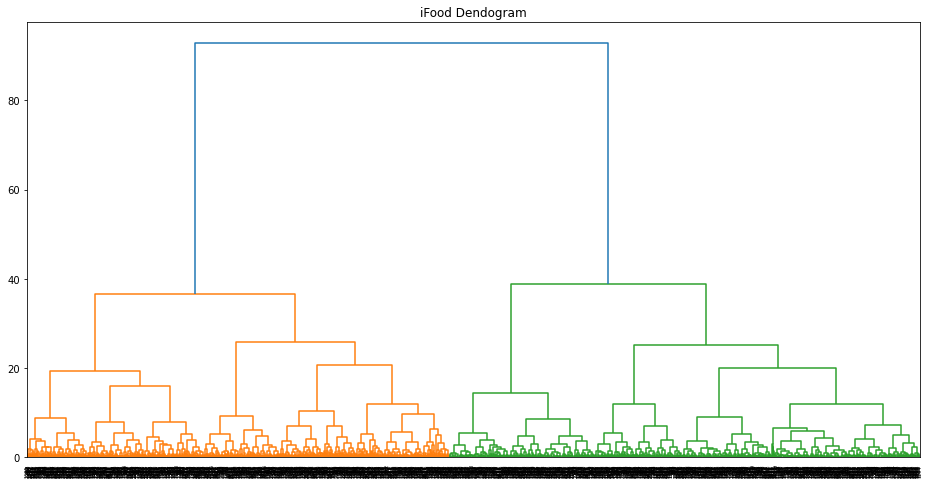

In [14]:
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("iFood Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl); 

In [15]:
K=5
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

In [16]:
df['Cluster ID'] = labels
df.head(9)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Fequency,Cluster ID
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,0.008859,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,0.002641,5
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,0.008499,3
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,0.003481,5
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,0.008190,1
5,62513.0,0,1,16,520,42,98,0,42,14,...,0,0,0,1,0,702,688,0,0.008972,2
6,55635.0,0,1,34,235,65,164,50,49,27,...,0,0,1,0,0,563,536,0,0.007631,2
7,33454.0,1,0,32,76,10,56,3,1,23,...,0,0,0,0,1,146,123,0,0.003882,5
8,30351.0,1,0,19,14,0,24,3,3,2,...,0,0,0,0,1,44,42,0,0.002356,4


In [17]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

means = np.zeros((K, X.shape[1]))

for i, label in enumerate(set(labels)):
    means[i,:] = X[labels==label].mean(axis=0)
    print('\nCluster {} (n={}):'.format(label, sum(labels==label)))
    print(scaler.inverse_transform([means[i,:]])) 
    
means


Cluster 1 (n=437):
[[    0.01 69554.55  1143.4     69.7 ]]

Cluster 2 (n=188):
[[    0.01 33477.7    491.79    65.71]]

Cluster 3 (n=418):
[[    0.01 38333.41  1221.96    81.37]]

Cluster 4 (n=360):
[[    0.   27793.38   104.33    24.46]]

Cluster 5 (n=802):
[[    0.   63726.42   125.23    27.97]]


array([[ 0.89,  0.87,  1.01,  0.72],
       [ 0.26, -0.88, -0.12,  0.58],
       [ 1.05, -0.64,  1.14,  1.12],
       [-0.78, -1.15, -0.8 , -0.85],
       [-0.75,  0.58, -0.76, -0.73]])

In [18]:
from scipy import stats

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=features)
    tmp_df.loc[0]=  scaler.inverse_transform([d.minmax[0]])[0]
    tmp_df.loc[1] = scaler.inverse_transform([d.mean])[0]
    tmp_df.loc[2] = scaler.inverse_transform([d.minmax[1]])[0]
    tmp_df.loc[3] = scaler.inverse_transform([d.variance])[0]
    tmp_df.loc[4] = scaler.inverse_transform([d.skewness])[0]
    tmp_df.loc[5] = scaler.inverse_transform([d.kurtosis])[0]

    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis'] 
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(X.shape[0]))
d = stats.describe(X, axis=0)
display(stats_to_df(d, scaler))

for i, label in enumerate(set(labels)):
    d = stats.describe(X[labels==label], axis=0)
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(d.nobs))
    display(stats_to_df(d, scaler))

All Data:
Number of Instances: 2205


,Min,Mean,Max,Variance,Skewness,Kurtosis
Fequency,-0.00,0.01,0.01,0.01,0.01,0.00
Income,16535.54,51622.09,87411.58,72339.86,51583.31,26804.22
MntTotal,4.00,562.76,2491.00,1138.83,1089.74,435.65
Recency,-8.50,49.01,146.52,77.95,55.15,19.53



Cluster 1:
Number of Instances: 437


,Min,Mean,Max,Variance,Skewness,Kurtosis
Fequency,0.00,0.01,0.01,0.01,0.01,0.00
Income,26558.42,69554.55,87411.58,59543.11,33679.14,60211.08
MntTotal,306.00,1143.40,2262.00,863.88,834.75,372.39
Recency,27.05,69.70,116.24,57.37,58.80,45.88



Cluster 2:
Number of Instances: 188


,Min,Mean,Max,Variance,Skewness,Kurtosis
Fequency,0.00,0.01,0.01,0.01,0.01,0.01
Income,16535.54,33477.70,55195.20,57005.76,53251.68,29265.32
MntTotal,216.00,491.79,894.00,605.52,777.19,282.48
Recency,34.85,65.71,98.72,54.82,52.20,43.26



Cluster 3:
Number of Instances: 418


,Min,Mean,Max,Variance,Skewness,Kurtosis
Fequency,-0.00,0.01,0.01,0.01,0.00,0.02
Income,16535.54,38333.41,70945.43,60829.21,55076.50,29070.75
MntTotal,274.00,1221.96,2491.00,863.65,842.81,369.52
Recency,39.44,81.37,146.52,60.03,46.72,51.53



Cluster 4:
Number of Instances: 360


,Min,Mean,Max,Variance,Skewness,Kurtosis
Fequency,-0.00,0.00,0.01,0.01,0.01,0.00
Income,16535.54,27793.38,45172.33,54166.20,56252.32,32042.62
MntTotal,5.00,104.33,523.00,580.85,1362.94,1222.05
Recency,-8.50,24.46,56.63,55.53,63.01,29.31



Cluster 5:
Number of Instances: 802


,Min,Mean,Max,Variance,Skewness,Kurtosis
Fequency,-0.00,0.00,0.01,0.01,0.01,0.00
Income,16535.54,63726.42,87411.58,61065.86,48579.85,32866.96
MntTotal,4.00,125.23,775.00,597.00,1587.04,2193.05
Recency,-8.50,27.97,94.40,60.16,77.72,61.58


In [3]:
df = pd.read_csv("ifood_with_cluster.csv")

In [4]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Fequency,Cluster ID
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,0.008859,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,0.002641,4
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,0.008499,2
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,0.003481,4
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,0.008190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,1,0,0,1094,847,0,0.007087,1
2201,64014.0,2,1,56,406,0,30,0,0,8,...,0,0,0,0,1,436,428,1,0.010101,2
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,1,0,0,1217,1193,1,0.008211,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,0,0,0,1,0,782,721,0,0.009935,2


<AxesSubplot:>

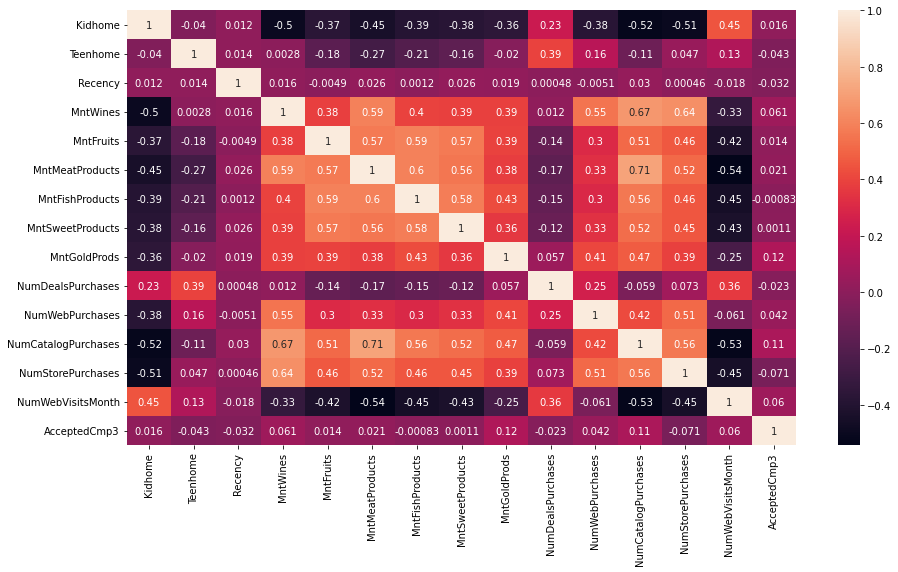

In [20]:
# Plotting the correlation between numerical variables
rels = df.iloc[:, 1:16]
corr = rels.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(corr, annot=True)

# Preprocessing

In [21]:
 def preprocess_inputs(df):
    df.copy()

    
    # Split the dataset into X , y
    y = df['Response']
    X = df.drop('Response', axis=1)

    # Slpit the X and y into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # Scale X_train and X_test
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


    return X_train, X_test, y_train, y_test

In [25]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [26]:
X_train

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Fequency
478,0.376906,-0.817219,0.914213,1.333711,0.034012,-0.031396,0.437022,-0.232420,-0.182438,-0.626356,...,-0.188601,-0.309646,-0.147832,-1.005850,2.211179,-0.528617,0.150875,0.214483,-0.447363,0.860099
669,0.865104,-0.817219,-0.917775,-1.565675,-0.135839,1.494981,1.759044,0.444633,-0.431554,0.450891,...,-0.188601,-0.309646,-0.147832,-1.005850,-0.452247,1.891728,0.716358,0.703098,-0.447363,0.096362
1009,0.808721,-0.817219,0.914213,0.173957,1.491161,1.344846,-0.030632,1.460211,-0.381731,-0.215043,...,-0.188601,3.229494,-0.147832,-1.005850,-0.452247,-0.528617,1.065014,1.126805,-0.447363,1.905477
1138,1.347955,-0.817219,-0.917775,-1.019908,1.050142,1.344846,1.417297,1.513663,-0.331908,-0.606769,...,-0.188601,-0.309646,-0.147832,0.994184,-0.452247,-0.528617,1.375509,1.485603,-0.447363,-0.286668
625,-0.280537,-0.817219,0.914213,-0.985798,-0.001746,-0.581892,-0.633186,-0.606581,-0.581024,1.959037,...,-0.188601,-0.309646,-0.147832,0.994184,-0.452247,-0.528617,-0.385119,-0.580643,1.079807,-0.020329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,-0.238105,1.042617,0.914213,0.208067,-0.874843,-0.631938,-0.741106,-0.677849,-0.655759,-0.724287,...,5.302189,3.229494,-0.147832,-1.005850,-0.452247,-0.528617,-0.950602,-0.921411,-0.447363,-1.431560
905,-1.325808,-0.817219,-0.917775,1.674815,-0.693072,0.043672,0.221182,-0.499678,-0.057880,1.391034,...,-0.188601,-0.309646,-0.147832,-1.005850,2.211179,-0.528617,-0.367773,-0.510326,-0.447363,-0.073407
1096,-0.880189,1.042617,-0.917775,-1.326902,-0.862923,-0.606915,-0.673656,-0.624398,-0.655759,-0.391320,...,-0.188601,-0.309646,-0.147832,-1.005850,-0.452247,1.891728,-0.910706,-0.910593,1.079807,-1.272201
235,0.656099,-0.817219,0.914213,0.276288,1.950058,0.043672,0.068295,3.241928,1.088056,0.509650,...,-0.188601,-0.309646,-0.147832,-1.005850,2.211179,-0.528617,1.555908,1.570344,-0.447363,1.052627


In [27]:
y_train

478     0
669     0
1009    0
1138    0
625     0
       ..
960     0
905     0
1096    1
235     0
1061    1
Name: Response, Length: 1543, dtype: int64

In [ ]:
# Train model

In [1]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
        ]
)

history = model.fit(
    X_train, 
    y_train, 
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

NameError: name 'tf' is not defined

In [ ]:
results = model.evaluate(X_test, y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))
print("     Test AUC: {:.5f}".format(results[2]))

In [ ]:
y_pred = np.array(model.predict(X_test) >= 0.5, dtype=np.int)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=["NEGETIVE", "POSITIVE"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGETIVE", "POSITIVE"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGETIVE", "POSITIVE"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)